<h1 align="center">Title: K-Nearest Neighbors Classification</h1>
<p>Name: Muhammad Mobeen<br>
Reg No: 200901097<br>
BS-CS-01(B)<br>
Machine Learning Assignment #1<br>
Github URL: <a href="https://github.com/muhammad-mobeen/KNN-Classifier-Algorithm">github.com/muhammad-mobeen/KNN-Classifier-Algorithm</a><br>
Submitted to Mam Ammara Yaseen</p>

<h1 align="center">Task #1</h1>

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
from collections import Counter
import pandas as pd 
import numpy as np 
import itertools
import random 
import warnings
warnings.filterwarnings("ignore")
random.seed(0)

##### Data Preprocessing

In [2]:
# Preprocess the data and create the train / test sets 
full_df = pd.read_csv("new_titanic.csv")
X_train = full_df[:891]
y_train = full_df['Survived'][:891]
X_test = full_df[891:]
del X_train['Survived']
del X_test['Survived']


print(f'After preprocessing there are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the training data.\n')
print(f'After preprocessing there are {X_test.shape[0]} rows and {X_test.shape[1]} columns in the test data.')

After preprocessing there are 891 rows and 36 columns in the training data.

After preprocessing there are 418 rows and 36 columns in the test data.


In [3]:
# Converting our data from pandas dataframe to python lists. 
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()

##### KNN Algorithm Class Developed From Scratch 

In [6]:
class KNearestNeighbors():
    def __init__(self,k, mode='euclidean'or'manhattan'):
        self.k = k 
        self.X_train = None  
        self.classes = []
        self.mode = mode
    
    def euclidean_distance(self,row1,row2):
      sum = 0
      for i,j in zip(row1,row2):
        sum += (i-j) ** 2 
      distance = sum ** 0.5 
      return distance
    
    def manhattan_distance(self,row1, row2):
        return sum(abs(i - j) for i, j in zip(row1, row2))


    def sort_distances(self,classes,distances,k):
      # Sort in descending order the distances and retrieve the index 
      # which maps to their corresponding class 
      idxs = sorted(range(len(distances)),key = lambda x:distances[x])[:self.k] 
      # Finding the class for each neighbor  
      neighbors = [self.classes[idx] for idx in idxs]
      # Choosing the most ocurring class 
      prediction = Counter(neighbors).most_common(1) # bit of a cheat here :)
      return prediction[0][0]

    def fit(self,X_train,y_train):
        self.X_train = X_train
        predictions = []

        if self.mode == 'euclidean':
            # For each passenger in the training dataset:
            for i in range(len(X_train)):
                distances = []
                classes = []
                # Estimate the Euclidean distance for the current 
                # passenger with all the other passengers 
                for x,y in zip(X_train,y_train):
                    distances.append(self.euclidean_distance(X_train[i],x))
                    # Append the class that corresponds to the current passenger
                    self.classes.append(y)
                # Predict the class for the current passenger 
                prediction = self.sort_distances(self.classes,distances,self.k)
                predictions.append(prediction)
        elif self.mode == 'manhattan':
            # For each passenger in the training dataset:
            for i in range(len(X_train)):
                distances = []
                classes = []
                # Estimate the Euclidean distance for the current 
                # passenger with all the other passengers 
                for x,y in zip(X_train,y_train):
                    distances.append(self.manhattan_distance(X_train[i],x))
                    # Append the class that corresponds to the current passenger
                    self.classes.append(y)
                # Predict the class for the current passenger 
                prediction = self.sort_distances(self.classes,distances,self.k)
                predictions.append(prediction)
                
        f1_scor = f1_score(predictions, y_train)
        confusion_mat = confusion_matrix(predictions, y_train)
        print(f'    -> Accuracy: {round(accuracy_score(predictions,y_train)*100,2)}%.')
        print(f'    -> F1 Score: {f1_scor}')
        sns.heatmap(confusion_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Survived\nActual','Not Survived\nActual'], yticklabels=['Predicted\nSurvived','Predicted\nNot Survived'])
        plt.show()

        
        return (predictions, f1_scor) 

    def predict(self,X_test):
        # Predictions for the test data 
        predictions = []
        if self.mode == 'euclidean':
            for i in range(len(X_test)):
                distances = []
                for x in self.X_train:
                    distances.append(self.euclidean_distance(X_test[i],x))
                prediction = self.sort_distances(self.classes,distances,self.k)
                predictions.append(prediction)
        elif self.mode == 'manhattan':
            for i in range(len(X_test)):
                distances = []
                for x in self.X_train:
                    distances.append(self.manhattan_distance(X_test[i],x))
                prediction = self.sort_distances(self.classes,distances,self.k)
                predictions.append(prediction)
        return predictions 

##### Testing the KNN Classifier and it's Results

K: 1
Distance Mode: manhattan
Result:- 
    -> Accuracy: 99.1%.
    -> F1 Score: 0.9884057971014494


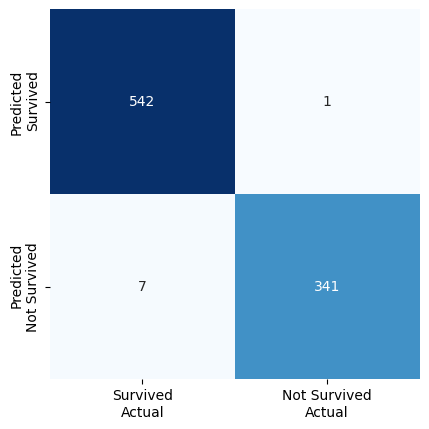


K: 1
Distance Mode: euclidean
Result:- 
    -> Accuracy: 99.1%.
    -> F1 Score: 0.9884057971014494


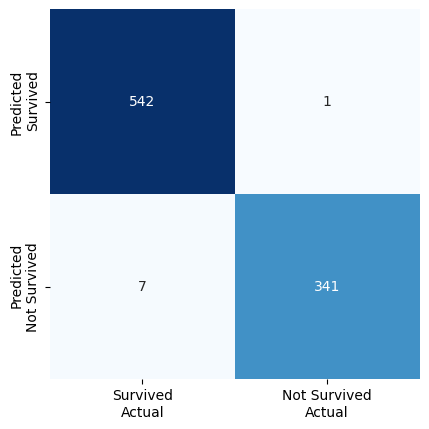


-------------------------------------------------------
K: 2
Distance Mode: manhattan
Result:- 
    -> Accuracy: 99.1%.
    -> F1 Score: 0.9884057971014494


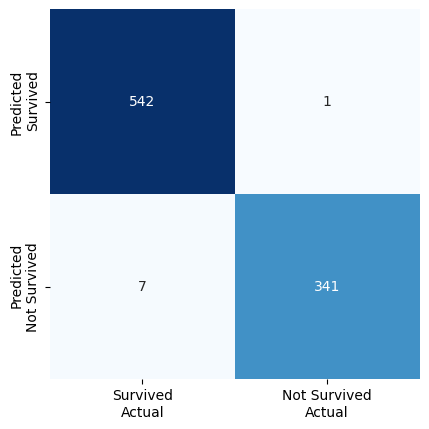


K: 2
Distance Mode: euclidean
Result:- 
    -> Accuracy: 99.1%.
    -> F1 Score: 0.9884057971014494


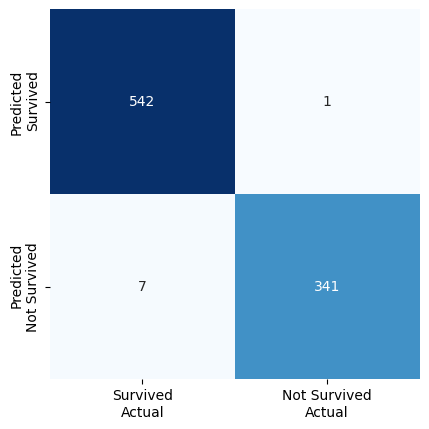


-------------------------------------------------------
K: 3
Distance Mode: manhattan
Result:- 
    -> Accuracy: 86.2%.
    -> F1 Score: 0.8161434977578476


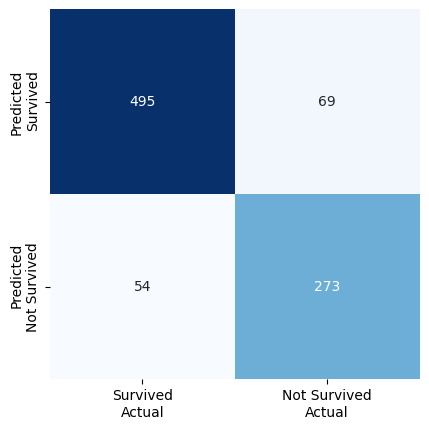


K: 3
Distance Mode: euclidean
Result:- 
    -> Accuracy: 83.84%.
    -> F1 Score: 0.7798165137614679


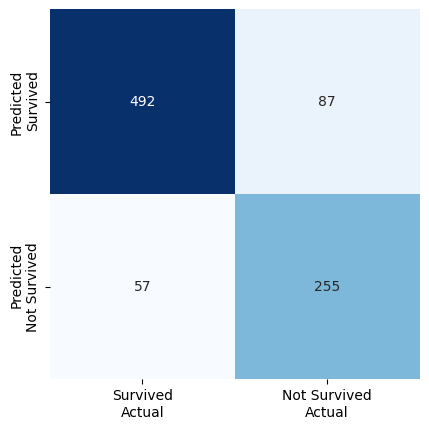


-------------------------------------------------------
K: 4
Distance Mode: manhattan
Result:- 
    -> Accuracy: 90.68%.
    -> F1 Score: 0.875187969924812


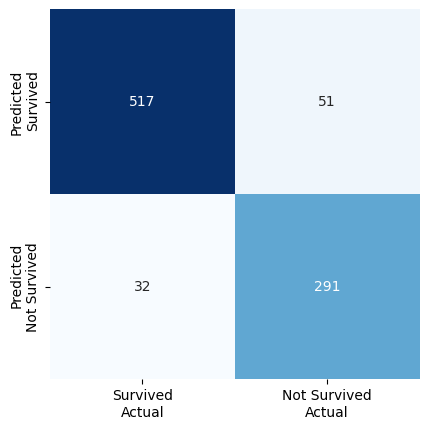


K: 4
Distance Mode: euclidean
Result:- 
    -> Accuracy: 88.78%.
    -> F1 Score: 0.8489425981873112


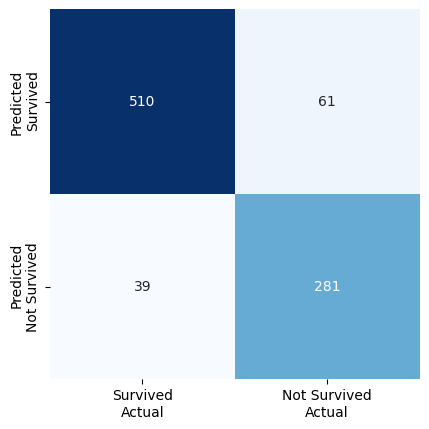


-------------------------------------------------------
K: 5
Distance Mode: manhattan
Result:- 
    -> Accuracy: 83.61%.
    -> F1 Score: 0.7801204819277109


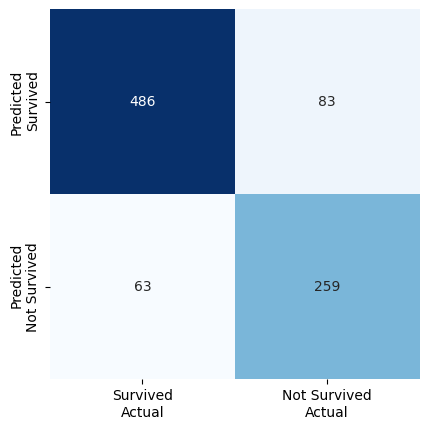


K: 5
Distance Mode: euclidean
Result:- 
    -> Accuracy: 80.81%.
    -> F1 Score: 0.7389312977099237


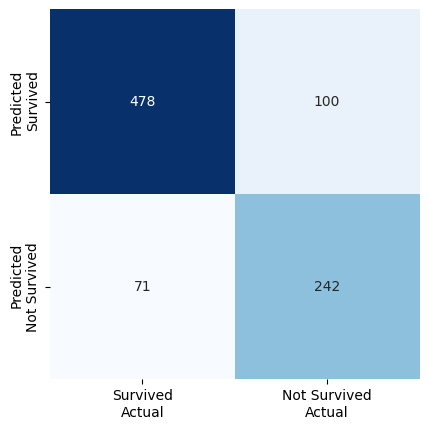


-------------------------------------------------------
K: 6
Distance Mode: manhattan
Result:- 
    -> Accuracy: 86.42%.
    -> F1 Score: 0.8185907046476761


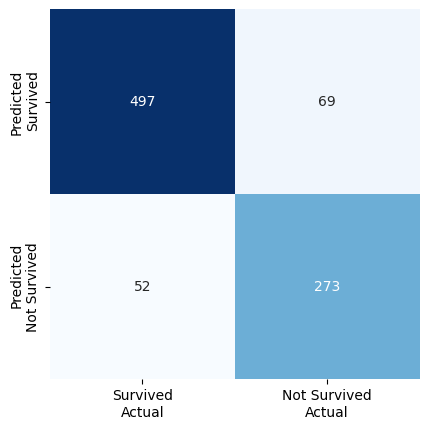


K: 6
Distance Mode: euclidean
Result:- 
    -> Accuracy: 86.31%.
    -> F1 Score: 0.8134556574923547


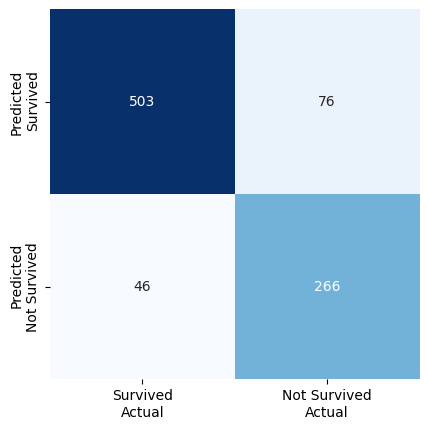


-------------------------------------------------------
K: 7
Distance Mode: manhattan
Result:- 
    -> Accuracy: 82.38%.
    -> F1 Score: 0.7646176911544228


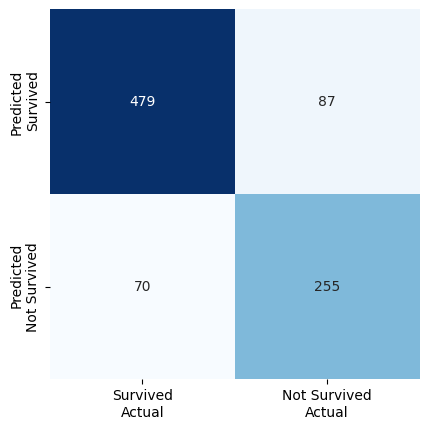


K: 7
Distance Mode: euclidean
Result:- 
    -> Accuracy: 80.13%.
    -> F1 Score: 0.730593607305936


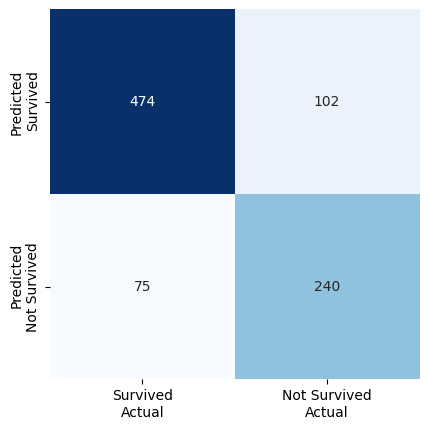


-------------------------------------------------------


In [7]:
manhattan_F1_score_list = []
euclidean_F1_score_list = []
for i in range(1,8):
    manhattan_KNN = KNearestNeighbors(k=i, mode='manhattan')
    print("K: {}\nDistance Mode: {}\nResult:- ".format(i,manhattan_KNN.mode))
    _, f1scr = manhattan_KNN.fit(X_train,y_train)
    predictions = manhattan_KNN.predict(X_test)
    manhattan_F1_score_list.append(f1scr)
    print('')

    euclidean_KNN = KNearestNeighbors(k=i, mode='euclidean')
    print("K: {}\nDistance Mode: {}\nResult:- ".format(i,euclidean_KNN.mode))
    _, f1scr = euclidean_KNN.fit(X_train,y_train)
    predictions = euclidean_KNN.predict(X_test)
    euclidean_F1_score_list.append(f1scr)
    print('\n-------------------------------------------------------')

##### K, F1 Score Graph for Manhattan and Euclidean Distances Respectively

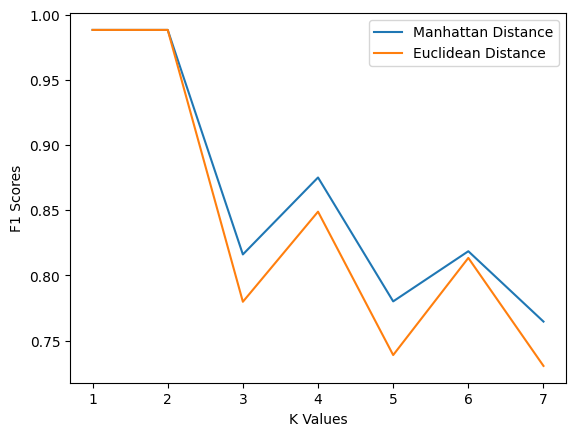

In [13]:
k = [1,2,3,4,5,6,7]
fig, ax = plt.subplots()
ax.plot(k, manhattan_F1_score_list, label="Manhattan Distance")
ax.plot(k, euclidean_F1_score_list, label="Euclidean Distance")
plt.ylabel('F1 Scores')
plt.xlabel('K Values')
plt.legend(loc="upper right")
plt.show()

<h1 align="center">Task #2</h1>

##### Importing the KNN Classifier from scikit-learn and Showing it's Results

K: 1
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 99.1%.
    -> F1 Score: 0.9884057971014494


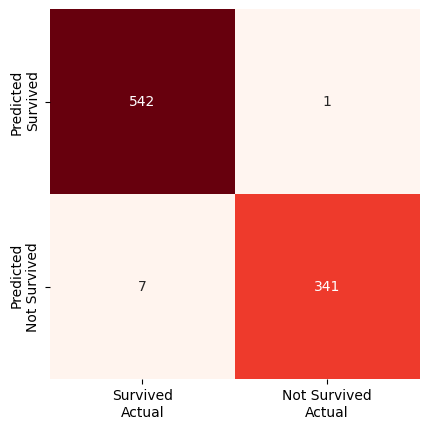

----------------------------------------------------------

K: 2
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 85.97%.
    -> F1 Score: 0.7779751332149201


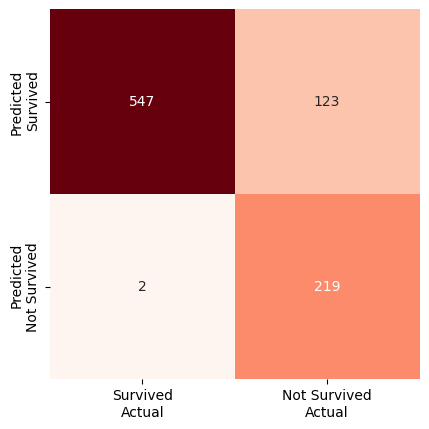

----------------------------------------------------------

K: 3
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 86.31%.
    -> F1 Score: 0.818452380952381


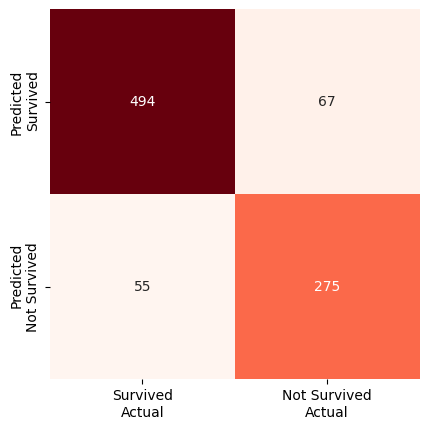

----------------------------------------------------------

K: 4
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 82.83%.
    -> F1 Score: 0.7419898819561551


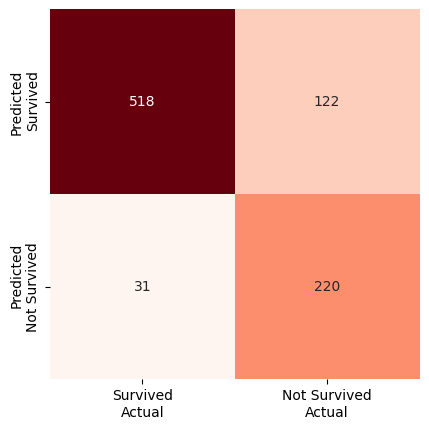

----------------------------------------------------------

K: 5
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 83.73%.
    -> F1 Score: 0.7812971342383107


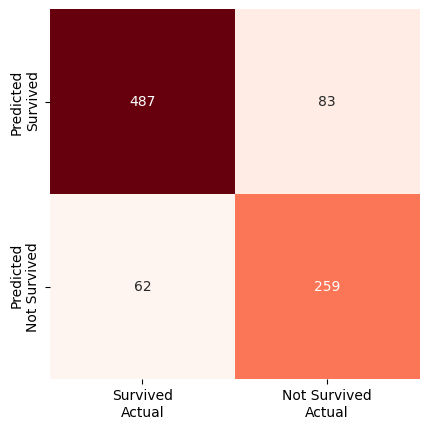

----------------------------------------------------------

K: 6
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 82.27%.
    -> F1 Score: 0.7476038338658147


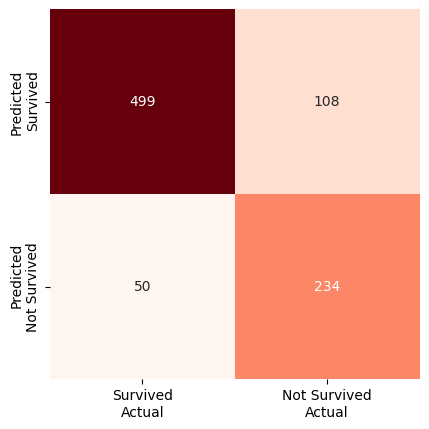

----------------------------------------------------------

K: 7
Distance Mode: Euclidean
Result:- 
    -> Accuracy: 82.38%.
    -> F1 Score: 0.7646176911544228


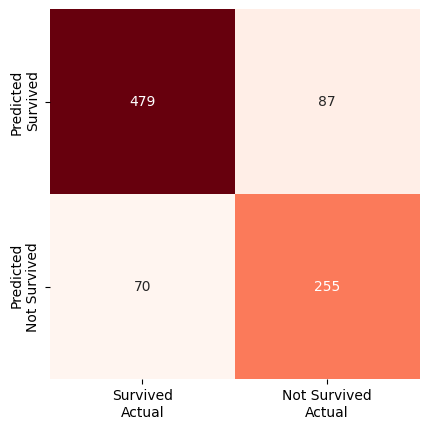

----------------------------------------------------------

K: 1
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 99.1%.
    -> F1 Score: 0.9884057971014494


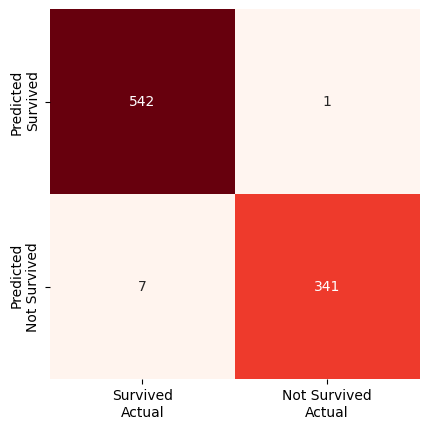

----------------------------------------------------------

K: 2
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 85.97%.
    -> F1 Score: 0.7779751332149201


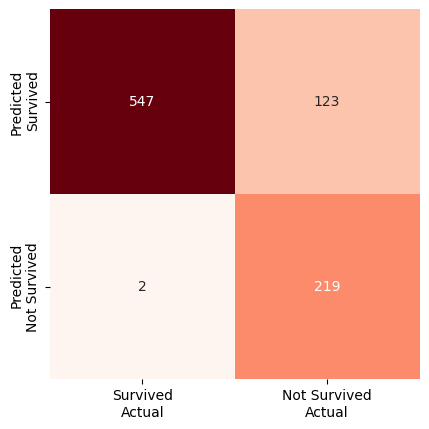

----------------------------------------------------------

K: 3
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 86.31%.
    -> F1 Score: 0.818452380952381


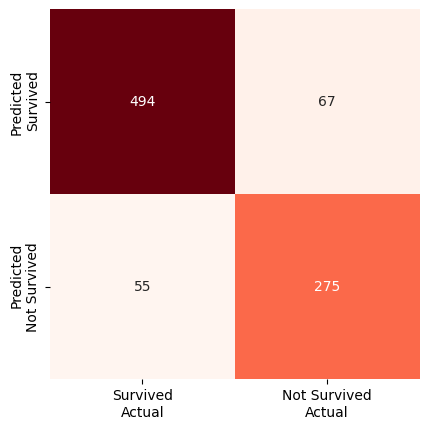

----------------------------------------------------------

K: 4
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 82.83%.
    -> F1 Score: 0.7419898819561551


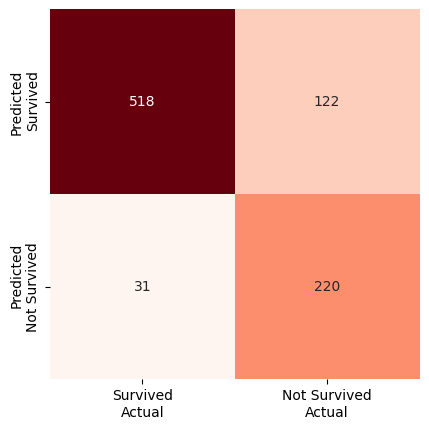

----------------------------------------------------------

K: 5
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 83.73%.
    -> F1 Score: 0.7812971342383107


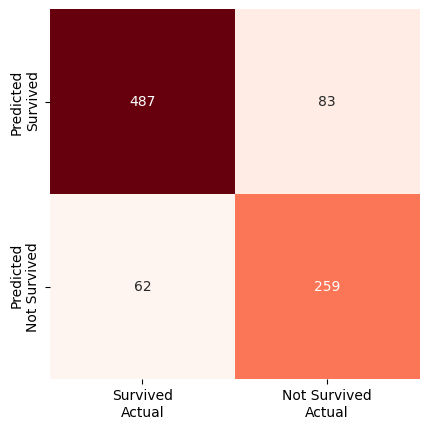

----------------------------------------------------------

K: 6
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 82.27%.
    -> F1 Score: 0.7476038338658147


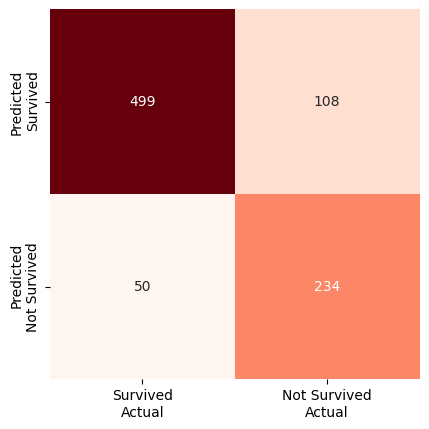

----------------------------------------------------------

K: 7
Distance Mode: Manhattan
Result:- 
    -> Accuracy: 82.38%.
    -> F1 Score: 0.7646176911544228


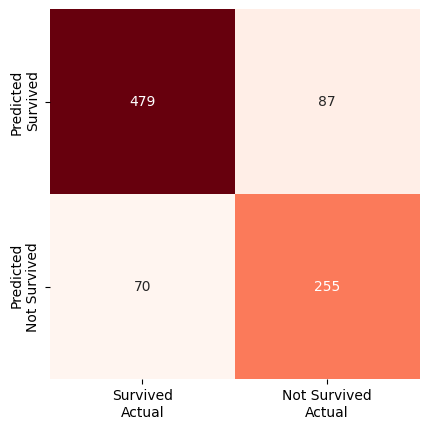

----------------------------------------------------------



In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = [1,2,3,4,5,6,7]
euclidean_F1_score_list = []
manhattan_F1_score_list = []

for i in k:
    # Euclidean
    neigh = KNeighborsClassifier(n_neighbors=i, p=1)
    neigh.fit(X_train, y_train)
    training_predictions = neigh.predict(X_train)

    f1_scor = f1_score(training_predictions, y_train)
    confusion_mat = confusion_matrix(training_predictions, y_train)
    euclidean_F1_score_list.append(f1_scor)
    print("K: {}\nDistance Mode: {}\nResult:- ".format(i,"Euclidean"))
    print(f'    -> Accuracy: {round(accuracy_score(training_predictions,y_train)*100,2)}%.')
    print(f'    -> F1 Score: {f1_scor}')
    sns.heatmap(confusion_mat, square=True, annot=True, cmap='Reds', fmt='d', cbar=False, xticklabels=['Survived\nActual','Not Survived\nActual'], yticklabels=['Predicted\nSurvived','Predicted\nNot Survived'])
    plt.show()

    print("----------------------------------------------------------\n")

    # predictions = neigh.predict(X_test)

for i in k:
    # Manhattan
    neigh = KNeighborsClassifier(n_neighbors=i, metric='manhattan', p=1)
    neigh.fit(X_train, y_train)
    training_predictions = neigh.predict(X_train)

    f1_scor = f1_score(training_predictions, y_train)
    confusion_mat = confusion_matrix(training_predictions, y_train)
    manhattan_F1_score_list.append(f1_scor)
    print("K: {}\nDistance Mode: {}\nResult:- ".format(i,"Manhattan"))
    print(f'    -> Accuracy: {round(accuracy_score(training_predictions,y_train)*100,2)}%.')
    print(f'    -> F1 Score: {f1_scor}')
    sns.heatmap(confusion_mat, square=True, annot=True, cmap='Reds', fmt='d', cbar=False, xticklabels=['Survived\nActual','Not Survived\nActual'], yticklabels=['Predicted\nSurvived','Predicted\nNot Survived'])
    plt.show()

    print("----------------------------------------------------------\n")

    # predictions = neigh.predict(X_test)

##### K, F1 Score Graph for Manhattan and Euclidean Distances Respectively

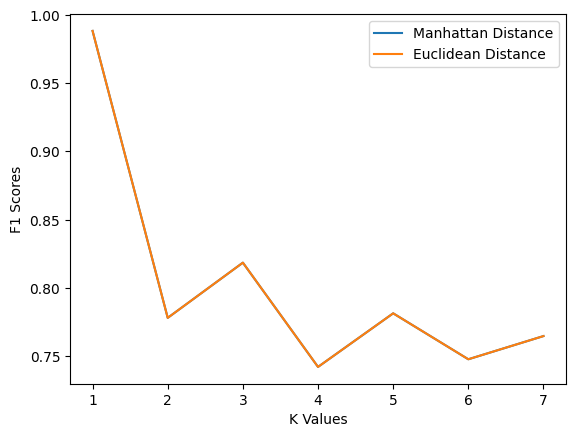

In [20]:
k = [1,2,3,4,5,6,7]
fig, ax = plt.subplots()
ax.plot(k, manhattan_F1_score_list, label="Manhattan Distance")
ax.plot(k, euclidean_F1_score_list, label="Euclidean Distance")
plt.ylabel('F1 Scores')
plt.xlabel('K Values')
plt.legend(loc="upper right")
plt.show()